色んなデータ拡張
===================

pytorchで利用できるデータ拡張は様々

いくつか紹介するので見ていく．

In [1]:
# モジュールのimport
import torch
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

In [2]:
# CIFAR10データセットのダウンロードする関数
def load_cifar10(transform):
    cifar10_dataset = datasets.CIFAR10(
                        root='./',
                        transform=transform,
                        download=True)
    return cifar10_dataset

In [3]:
# CIFAR10の画像を可視化する関数
def show_img(dataset):
    plt.figure(figsize=(15, 3))
    for i in range(5):
        image, label = dataset[i]
        image = image.permute(1, 2, 0)
        plt.subplot(1, 5, i+1)
        plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
        plt.tick_params(bottom=False, left=False, right=False, top=False)
        plt.imshow(image)
    plt.savefig('a.png')

ToTensor()
-------------------------------

そのままの入力では扱えないのでテンソル型に変換する


In [4]:
# 画像の加工、pytorchではテンソル型にする。
transform = transforms.Compose([
    transforms.ToTensor()
])

100%|██████████| 170498071/170498071 [00:02<00:00, 67894299.23it/s]


Extracting ./cifar-10-python.tar.gz to ./


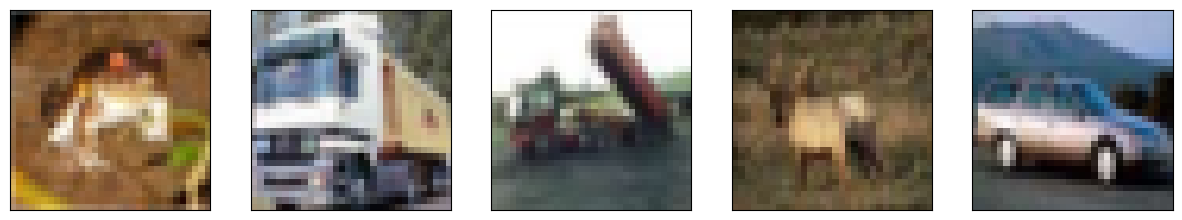

In [5]:
# CIFAR10のダウンロードと画像の可視化
cifar10_dataset = load_cifar10(transform)
show_img(cifar10_dataset)

Resize()
================

画像サイズを落としてる．

CIFAR10オリジナルのサイズは(32,32)だが(16,16)にしてる．

これによって同じデータセットを使ってるけど，より難しい問題を解いていることになる．

In [6]:
transform = transforms.Compose([
    transforms.Resize(16),
    transforms.ToTensor()
])

Files already downloaded and verified


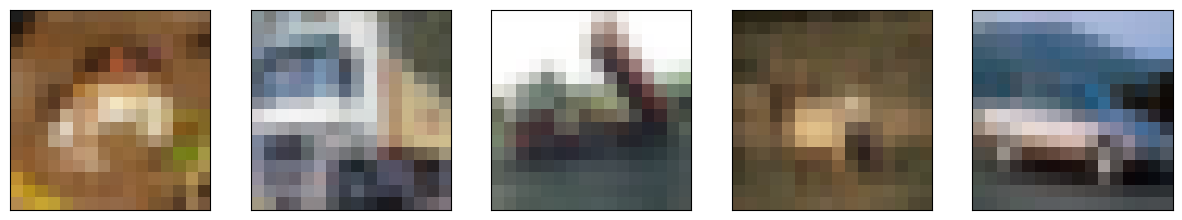

In [7]:
cifar10_dataset = load_cifar10(transform)
show_img(cifar10_dataset)

CenterCrop
======================

中心部分の抜き出しをしている．

サイズは自分で決めれる．

In [8]:
transform = transforms.Compose([
    transforms.CenterCrop(24),
    transforms.ToTensor()
])

Files already downloaded and verified


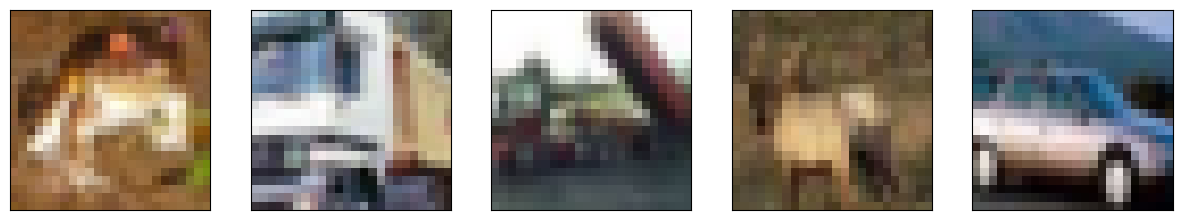

In [9]:
cifar10_dataset = load_cifar10(transform)
show_img(cifar10_dataset)

RandomCrop
=================

さっきのランダム版

In [10]:
transform = transforms.Compose([
    transforms.RandomCrop(24),
    transforms.ToTensor()
])

Files already downloaded and verified


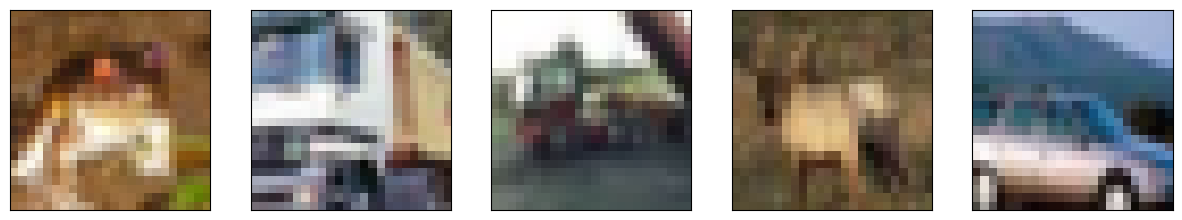

In [11]:
cifar10_dataset = load_cifar10(transform)
show_img(cifar10_dataset)

RandomHorizontalFlip
===================

一定の確率で左右反転させる．

pの値で決めてる．

In [12]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

Files already downloaded and verified


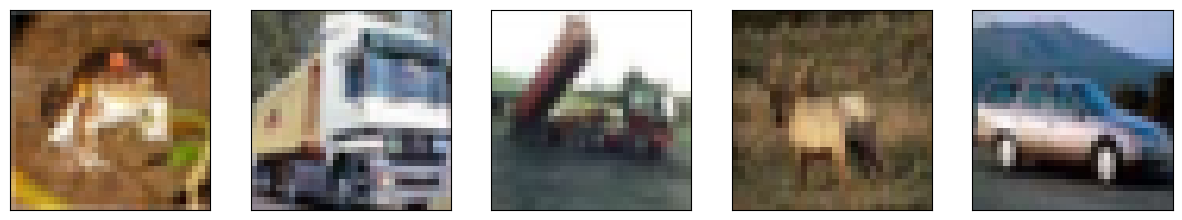

In [13]:
cifar10_dataset = load_cifar10(transform)
show_img(cifar10_dataset)

RandomVerticalFlip
=================

一定の確率で垂直反転させる．

In [14]:
transform = transforms.Compose([
    transforms.RandomVerticalFlip(p=0.5),
    transforms.ToTensor()
])

Files already downloaded and verified


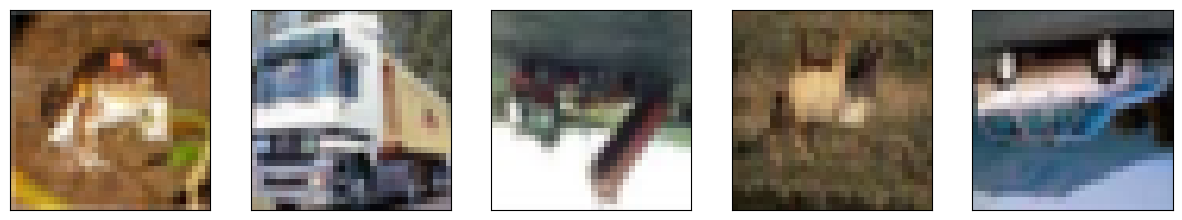

In [15]:
cifar10_dataset = load_cifar10(transform)
show_img(cifar10_dataset)

RandomRotation
================

ランダムに回転させる．

degreesはその角度を表していて今回だと+-30

In [16]:
transform = transforms.Compose([
    transforms.RandomRotation(degrees=30),
    transforms.ToTensor()
])

Files already downloaded and verified


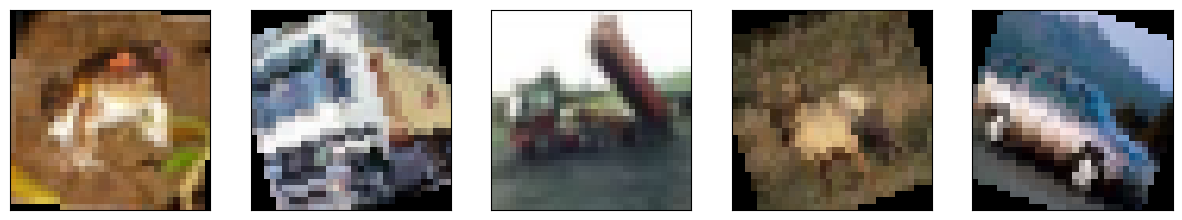

In [17]:
cifar10_dataset = load_cifar10(transform)
show_img(cifar10_dataset)

RandomErasing
=====================

p: Erasingされる確率。

scale: Erasingされる面積を全体の面積で割った数。デフォルト値では、全体の1/50から、1/3までErasingされる可能性がある．

ratio: Erasingされる長方形の縦横のアスペクト比。横長の長方形から、縦長の長方形まであル．

value: Erasingした範囲に適応する値。デフォルト値では1が設定され、真っ白．

In [18]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomErasing(p=0.8, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=1)
])

Files already downloaded and verified


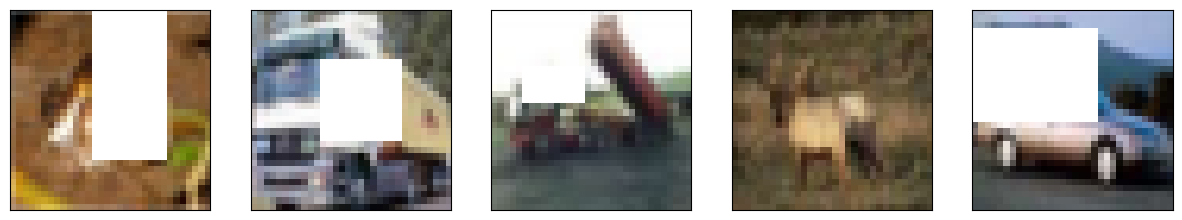

In [19]:
cifar10_dataset = load_cifar10(transform)
show_img(cifar10_dataset)

Normalize
======================

テンソル画像を平均と標準偏差で正規化する．

一般的なRGBのカラー画像だと、3チャンネル．

データの正規化はデータ数が少ないほど大事なので気をつける

In [20]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

Files already downloaded and verified


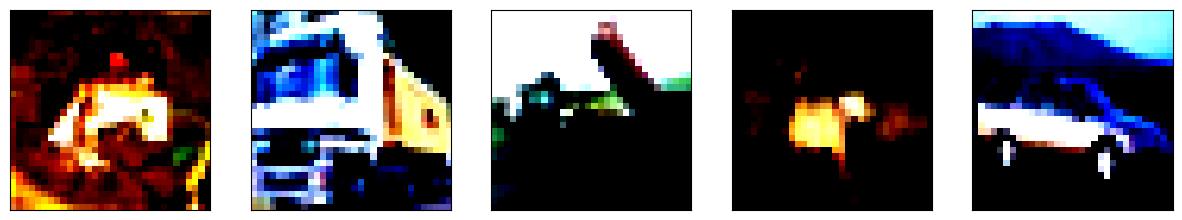

In [21]:
cifar10_dataset = load_cifar10(transform)
show_img(cifar10_dataset)

Grayscale
=================
画像を灰色にしてくれる．

num_output_channelsで、出力画像を1チャンネルか3チャンネルかを選べる．

3チャンネルにした場合、それぞれのピクセルの3チャンネルには同じ値になる．

In [22]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor()
])

Files already downloaded and verified


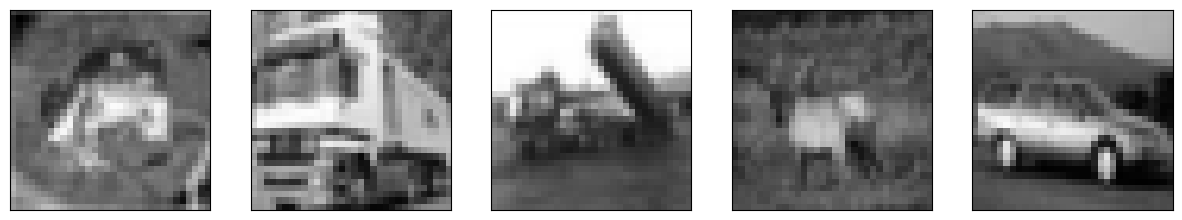

In [23]:
cifar10_dataset = load_cifar10(transform)
show_img(cifar10_dataset)

RandomApply
=====================

transformを適用する確率を設定できる

今回は灰色のやつにした

In [24]:
transform = transforms.Compose([
    transforms.RandomApply([transforms.Grayscale(num_output_channels=3)], p=0.5),
    transforms.ToTensor()
])

Files already downloaded and verified


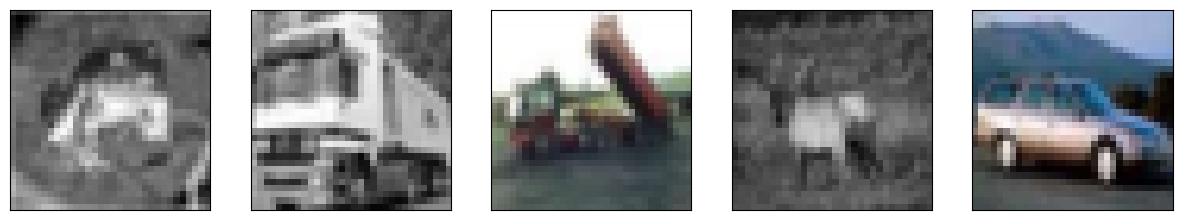

In [25]:
cifar10_dataset = load_cifar10(transform)
show_img(cifar10_dataset)

以上のようなデータ変換を組み合わせて使う

In [27]:
import torch


class Cutout:
    def __init__(self, size=16, p=0.5):
        self.size = size
        self.half_size = size // 2
        self.p = p

    def __call__(self, image):
        if torch.rand([1]).item() > self.p:
            return image

        left = torch.randint(-self.half_size, image.size(1) - self.half_size, [1]).item()
        top = torch.randint(-self.half_size, image.size(2) - self.half_size, [1]).item()
        right = min(image.size(1), left + self.size)
        bottom = min(image.size(2), top + self.size)

        image[:, max(0, left): right, max(0, top): bottom] = 0
        return image

In [28]:
transform = transforms.Compose([
      transforms.RandomCrop(size=(32, 32), padding=4),
      transforms.RandomHorizontalFlip(p=0),
      transforms.ToTensor(),
      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
      Cutout(size=16,p=1)
    ])

In [35]:
# CIFAR10の画像を可視化する関数
def show_img_flip0(dataset):
    plt.figure(figsize=(15, 3))
    for i in range(5):
        image, label = dataset[i]
        image = image.permute(1, 2, 0)
        plt.subplot(1, 5, i+1)
        plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
        plt.tick_params(bottom=False, left=False, right=False, top=False)
        plt.imshow(image)

        image = torch.flip(image,dims=[2])
        plt.subplot(1, 5, i+1)
        plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
        plt.tick_params(bottom=False, left=False, right=False, top=False)
        plt.imshow(image)
        plt.savefig('a.png')

Files already downloaded and verified


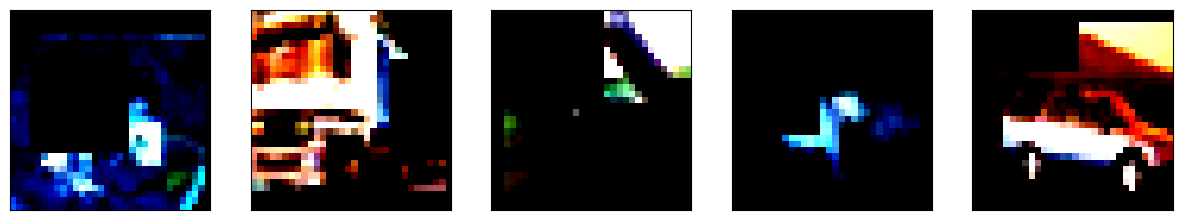

In [36]:
cifar10_dataset = load_cifar10(transform)
show_img_flip0(cifar10_dataset)

機械学習ではこのように変換された画像を読み込ませてモデルの学習を行う．

直感的な説明だとここまでの変換を施した後でも残る特徴が真に学ぶべき特徴．
